# Exploratory Data Analysis

In [17]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [33]:
# Load data
ames_clean = pd.read_csv('data/Ames_Housing_Price_Data_clean.csv')

In [34]:
print(ames_clean.columns)

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [35]:
# Set features and target
predictors = ames_clean.drop(columns=['SalePrice'])
target = ames_clean['SalePrice']

## Target Exploration

<AxesSubplot:>

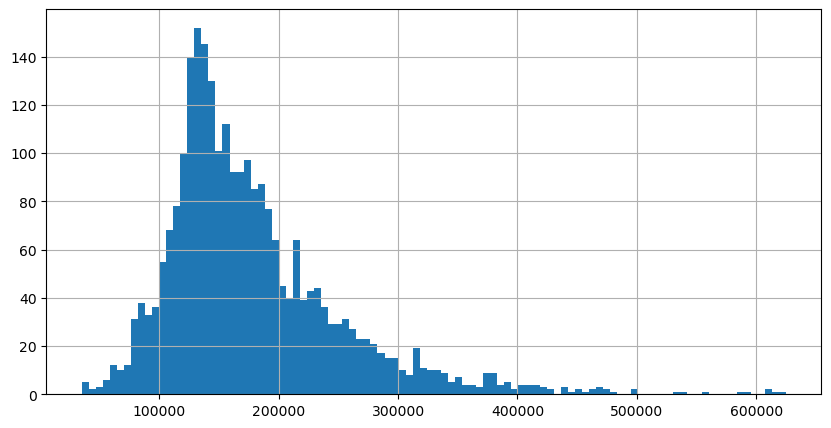

In [37]:
# Graph the distribution of the target variable
target.hist(bins=100, figsize=(10,5))

In [38]:
# Print the mean, median, max, and min of the target variable
print('Mean: ', target.mean())
print('Median: ', target.median())
print('Max: ', target.max())
print('Min: ', target.min())

Mean:  177891.02833850932
Median:  159900.0
Max:  625000
Min:  34900


<AxesSubplot:>

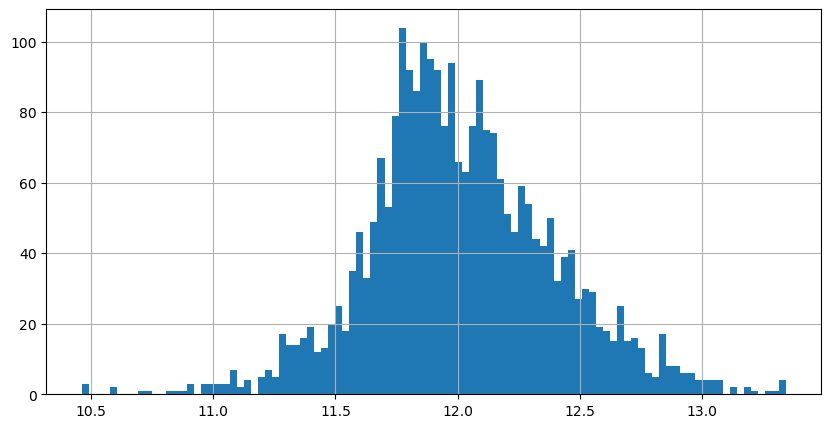

In [39]:
# Plot the log of the target variable
log_target = np.log(target)
log_target.hist(bins=100, figsize=(10,5))

## Intuition and Conventional Wisdom

Conventional wisdom identifies several key features important in determining a home's value:

1. Location
2. Home size and usable space
3. Age and condition
4. Upgrades and updates
5. The local market
6. Economic indicators
7. Interest rates

See:  https://www.opendoor.com/articles/factors-that-influence-home-value

Let's examine if this is true.

In [40]:
# Create linear regression object
lr = LinearRegression()

#### Neighborhood : Physical locations within Ames city limits

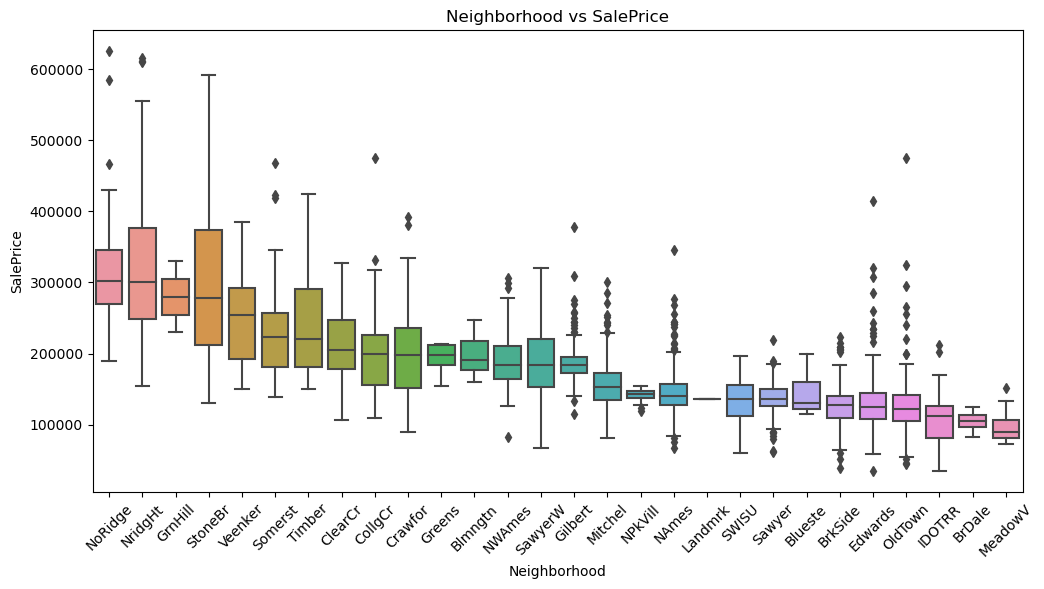

In [41]:
# Calculate median SalePrice for each Neighborhood
median_order = ames_clean.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False).index

# Create a box plot of SalePrice for each neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=ames_clean, order=median_order)

# Label the plot
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Condition1 : Proximity to various conditions

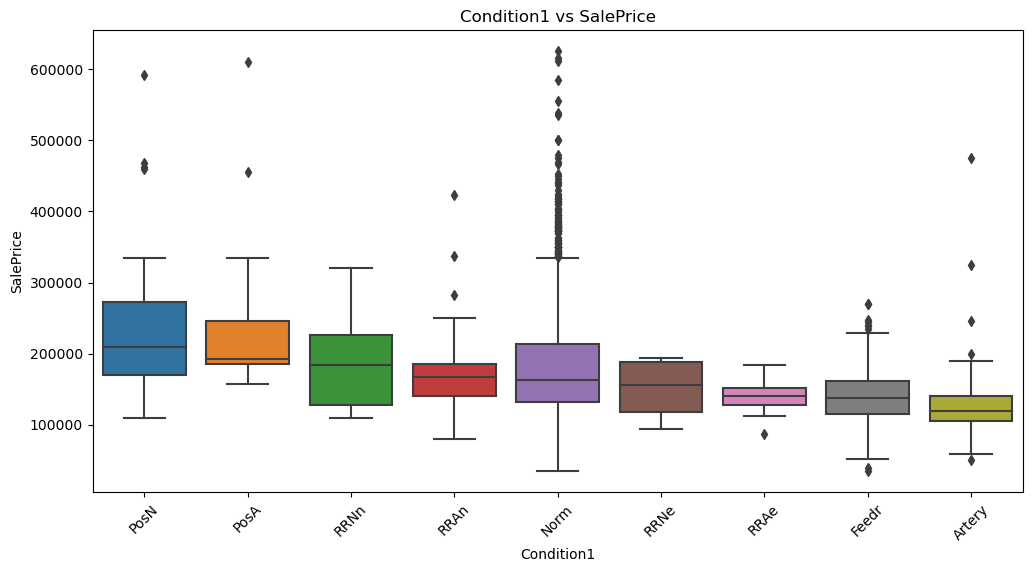

In [42]:
# Calculate median SalePrice for Condition1
median_order = ames_clean.groupby(['Condition1'])['SalePrice'].median().sort_values(ascending=False).index

# Create a box plot of SalePrice for each neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition1', y='SalePrice', data=ames_clean, order=median_order)

# Label the plot
plt.title('Condition1 vs SalePrice')
plt.xlabel('Condition1')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### LotArea : Lot size in square feet

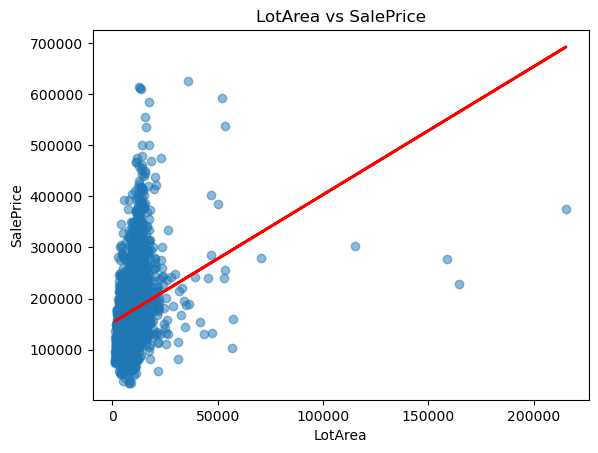

target R^2 = 0.07524216096405001


In [46]:
# Plot and score LotArea

# Fit the model
lr.fit(predictors[['LotArea']], target)

# Create scatter plot
plt.scatter(predictors['LotArea'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['LotArea'], lr.predict(predictors[['LotArea']]), color='red', linewidth=2)

# Label the plot
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"target R^2 = {lr.score(predictors[['LotArea']], target)}")

#### GrLivArea : Above grade (ground) living area square feet

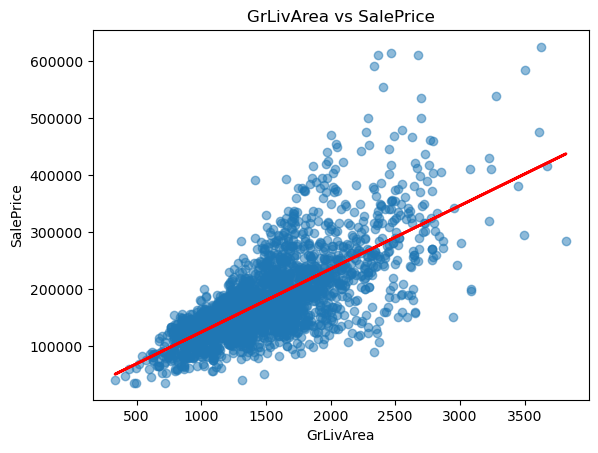

R^2 = 0.5201163079725513


In [50]:
# Plot and score GrLivArea

# Fit the model
lr.fit(predictors[['GrLivArea']], target)

# Create scatter plot
plt.scatter(predictors['GrLivArea'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['GrLivArea'], lr.predict(predictors[['GrLivArea']]), color='red', linewidth=2)

# Label the plot
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['GrLivArea']], target)}")

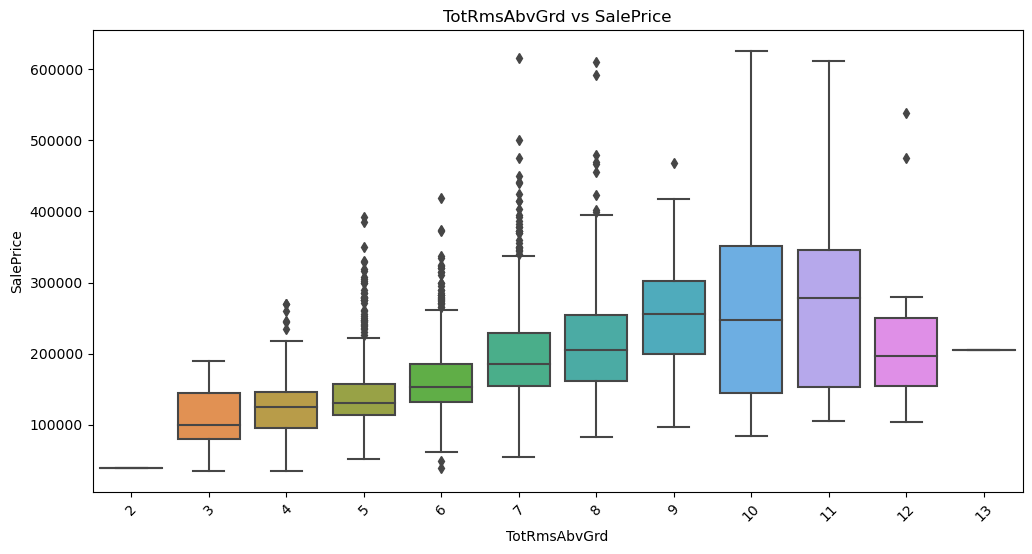

In [51]:
# Create a box plot of SalePrice vs. TotRmsAbvGrd
plt.figure(figsize=(12, 6))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=ames_clean)

# Label the plot
plt.title('TotRmsAbvGrd vs SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [52]:
# Fit the model
lr.fit(predictors[['TotRmsAbvGrd']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['TotRmsAbvGrd']], target)}")

R^2 = 0.23997418412842875


#### YearBuilt: Original construction date

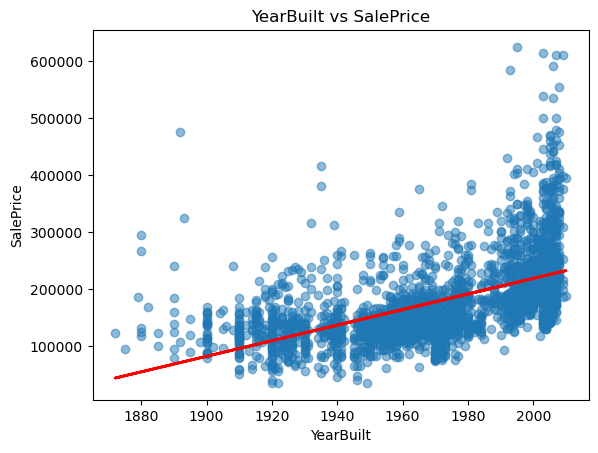

R^2 = 0.3004426773305948


In [53]:
# Plot and score YearBuilt

# Fit the model
lr.fit(predictors[['YearBuilt']], target)

# Create scatter plot
plt.scatter(predictors['YearBuilt'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['YearBuilt'], lr.predict(predictors[['YearBuilt']]), color='red', linewidth=2)

# Label the plot
plt.title('YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['YearBuilt']], target)}")

#### YearRemodAdd : Remodel date (same as construction date if no remodeling or additions)

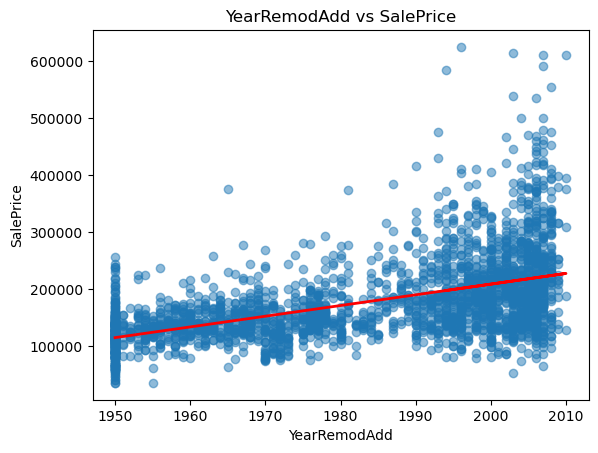

R^2 = 0.26953198273523493


In [54]:
# Plot and score YearRemodAdd

# Fit the model
lr.fit(predictors[['YearRemodAdd']], target)

# Create scatter plot
plt.scatter(predictors['YearRemodAdd'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['YearRemodAdd'], lr.predict(predictors[['YearRemodAdd']]), color='red', linewidth=2)

# Label the plot
plt.title('YearRemodAdd vs SalePrice')
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['YearRemodAdd']], target)}")

#### OverallQual : Rates the overall material and finish of the house

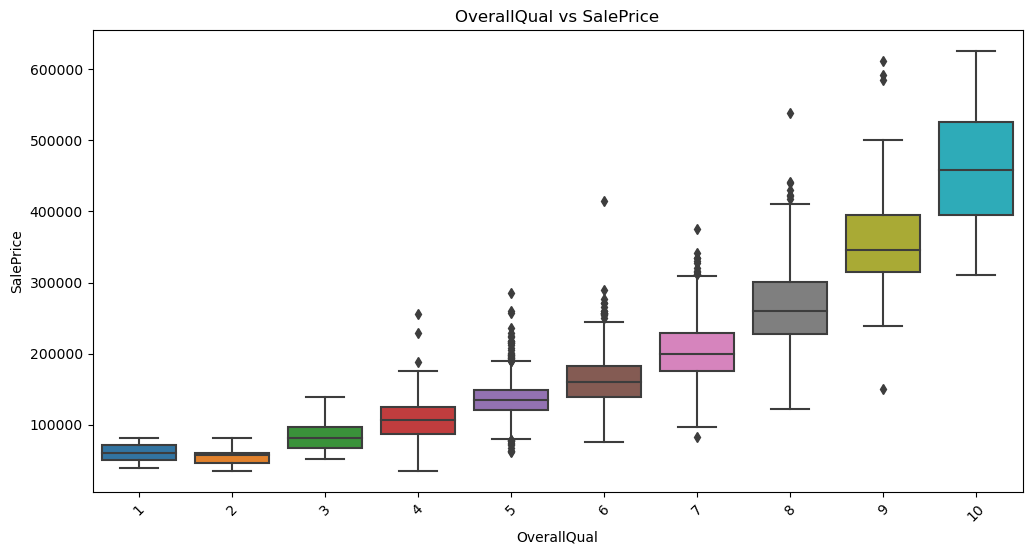

In [55]:
# Create a box plot of SalePrice vs. OverallQual
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=ames_clean)

# Label the plot
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [56]:
# Fit the model
lr.fit(predictors[['OverallQual']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['OverallQual']], target)}")

R^2 = 0.6291558560384246


#### OverallCond : Rates the overall condition of the house

In [57]:
# Fit the model
lr.fit(predictors[['OverallCond']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['OverallCond']], target)}")

R^2 = 0.01132490245038087
